# IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix ,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset
data=pd.read_csv('Loan Prediction Dataset.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# HANDLING NULL VALUES


In [17]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [8]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].replace(np.nan,data['Loan_Amount_Term'].mean())

In [9]:
data['LoanAmount']=data['LoanAmount'].replace(np.nan,data['LoanAmount'].mean())

In [10]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [11]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [12]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [13]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [18]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


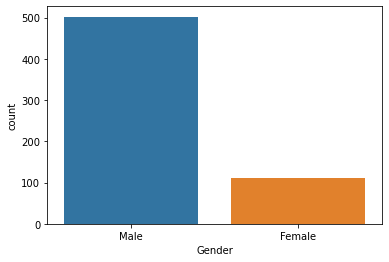

In [19]:
sns.countplot(data['Gender'])
plt.show()

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


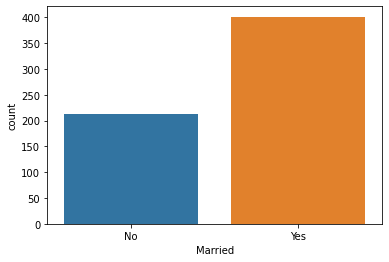

In [20]:
sns.countplot(data['Married'])
plt.show()

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


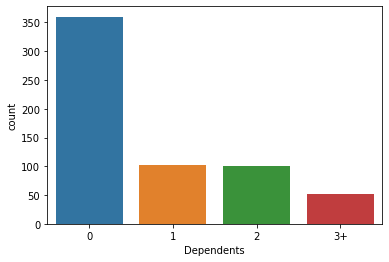

In [21]:
sns.countplot(data['Dependents'])
plt.show()

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


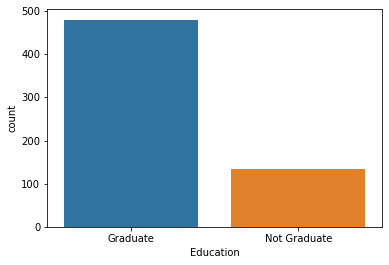

In [22]:
sns.countplot(data['Education'])
plt.show()

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


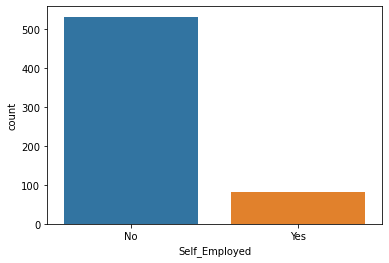

In [23]:
sns.countplot(data['Self_Employed'])
plt.show()

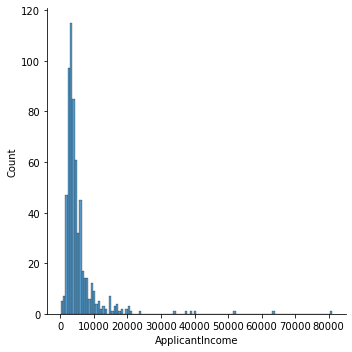

In [24]:
sns.displot(data['ApplicantIncome'])
plt.show()

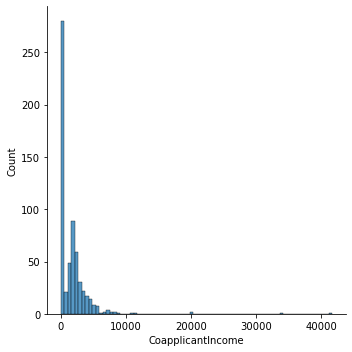

In [25]:
sns.displot(data['CoapplicantIncome'])
plt.show()

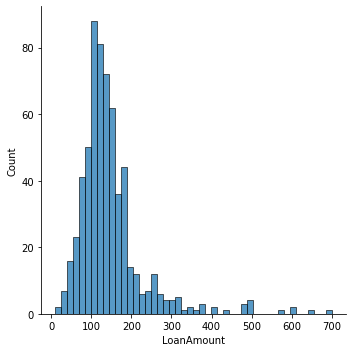

In [26]:
sns.displot(data['LoanAmount'])
plt.show()

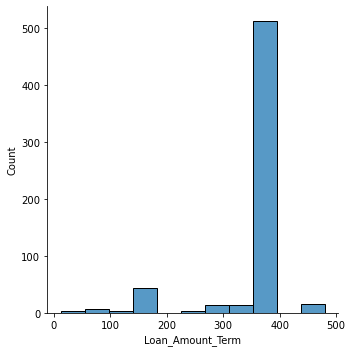

In [27]:
sns.displot(data['Loan_Amount_Term'])
plt.show()

C:\Users\apawa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


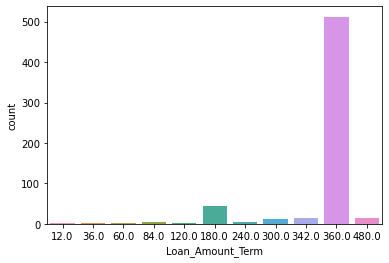

In [28]:
sns.countplot(data['Loan_Amount_Term'])
plt.show()

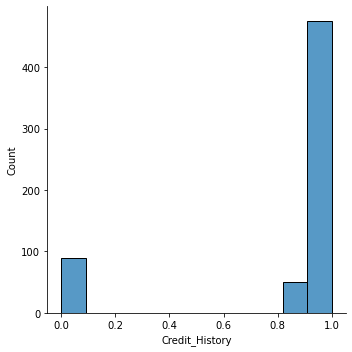

In [35]:
sns.displot(data['Credit_History'])
plt.show()

# CREATING NEW VARIABLE

In [36]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']

# LOG TRANSFORMATION

In [38]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [39]:
data['Total_Income']=np.log(data['Total_Income']+1)

In [40]:
data['ApplicantIncome']=np.log(data['ApplicantIncome']+1)

In [41]:
data['CoapplicantIncome']=np.log(data['CoapplicantIncome']+1)

In [42]:
data['LoanAmount']=np.log(data['LoanAmount']+1)

In [43]:
data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term']+1)

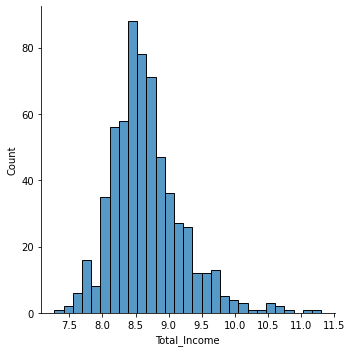

In [45]:
sns.displot(data['Total_Income'])
plt.show()

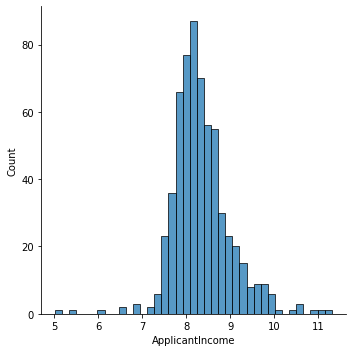

In [46]:
sns.displot(data['ApplicantIncome'])
plt.show()

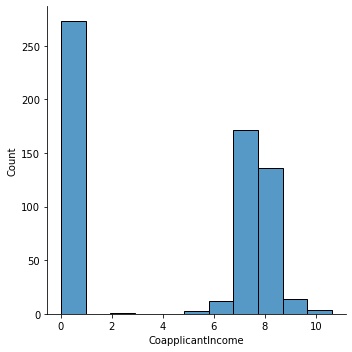

In [47]:
sns.displot(data['CoapplicantIncome'])
plt.show()

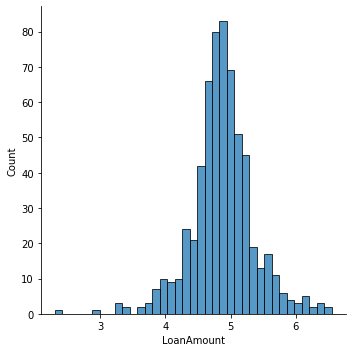

In [48]:
sns.displot(data['LoanAmount'])
plt.show()

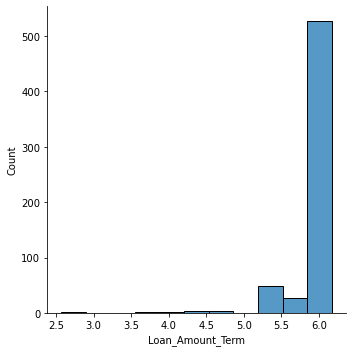

In [49]:
sns.displot(data['Loan_Amount_Term'])
plt.show()

In [50]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,5.888878,1.0,Urban,Y,8.674197
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,1.0,Rural,N,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,1.0,Urban,Y,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,1.0,Urban,Y,8.505525
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,1.0,Urban,Y,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972811,0.000000,4.276666,5.888878,1.0,Rural,Y,7.972811
610,LP002979,Male,Yes,3+,Graduate,No,8.320448,0.000000,3.713572,5.198497,1.0,Rural,Y,8.320448
611,LP002983,Male,Yes,1,Graduate,No,8.996280,5.484797,5.537334,5.888878,1.0,Urban,Y,9.025576
612,LP002984,Male,Yes,2,Graduate,No,8.933796,0.000000,5.236442,5.888878,1.0,Urban,Y,8.933796


# CORRELATION MATRX

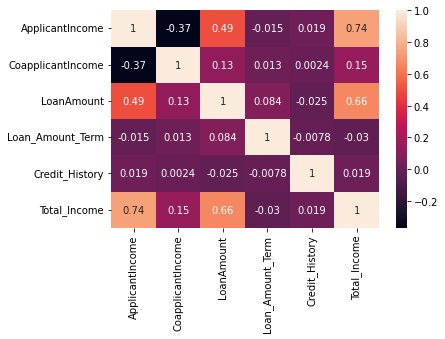

In [51]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# PREPROCESSING

In [55]:
LE=LabelEncoder()
cols=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
for i in cols:
    LE.fit(data[i])
    data[i]=LE.transform(data[i])

In [64]:
data=data.drop(['Loan_ID'],axis=1)

# SPLITTING DATA INTO FEATURES AND TARGETS

In [65]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [66]:
X=data[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Total_Income']]

In [67]:
y=data['Loan_Status']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# MODEL BUILDING AND TRAINING

In [69]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 76.62337662337663
Cross validation is 79.15500466480074


C:\Users\apawa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\apawa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [71]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 78.57142857142857
Cross validation is 78.50593096094896


In [72]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 73.37662337662337
Cross validation is 73.2880181260829


In [73]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 74.67532467532467
Cross validation is 77.03985072637612
